# Importing necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

#age
#sex
#chest pain type (4 values)
#resting blood pressure
#serum cholestoral in mg/dl
#fasting blood sugar > 120 mg/dl
#resting electrocardiographic results (values 0,1,2)
#maximum heart rate achieved
#exercise induced angina
#oldpeak = ST depression induced by exercise relative to rest
#the slope of the peak exercise ST segment
#number of major vessels (0-3) colored by flourosopy
#thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
#The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

# Loading the dataset

In [3]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('C:/Users/anlin/MDP/heart.csv')
heart_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
heart_data.shape

(1025, 14)

In [6]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
heart_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
heart_data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [9]:
#Checking for Duplicates
heart_data.duplicated().sum()

723

In [10]:
#Removing Duplicates
heart_data=heart_data.drop_duplicates()

In [11]:
heart_data.shape

(302, 14)

In [12]:
heart_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### We can see there is no null value exists in this dataset

In [13]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [14]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
heart_data['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

In [16]:
heart_data['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

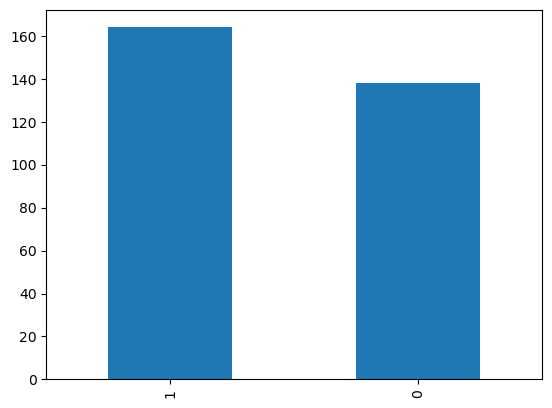

In [17]:
heart_data['target'].value_counts().plot(kind='bar')
plt.show()

In [18]:
heart_data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.585366,0.560976,1.371951,129.250000,242.640244,0.140244,0.591463,158.378049,0.140244,0.586585,1.591463,0.341463,2.121951


(array([ 1., 10., 33., 38., 37., 60., 63., 43., 14.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

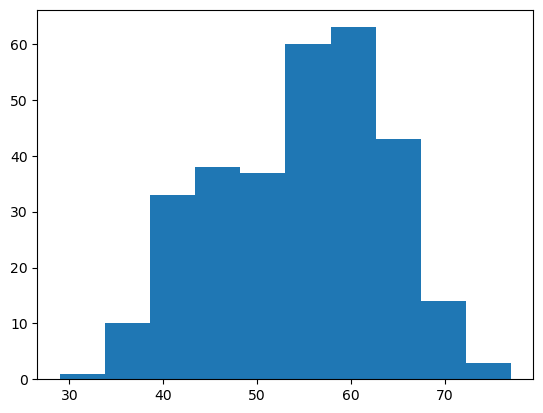

In [19]:
plt.hist(heart_data['age'])

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
heart_data['oldpeak'] = le.fit_transform(heart_data['oldpeak'])

In [21]:
heart_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,10,2,2,3,0
1,53,1,0,140,203,1,0,155,1,29,0,0,3,0
2,70,1,0,145,174,0,1,125,1,25,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,18,1,3,2,0
5,58,0,0,100,248,0,0,122,0,10,1,0,2,1
6,58,1,0,114,318,0,2,140,0,37,0,3,1,0
7,55,1,0,160,289,0,0,145,1,8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,30,1,2,2,0


In [22]:
cn=heart_data.corr()
cn

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.214250,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.107278,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.140640,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.186406,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.059952,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.011448,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.060062,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.354744,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.297152,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.214250,0.107278,-0.140640,0.186406,0.059952,0.011448,-0.060062,-0.354744,0.297152,1.000000,-0.577868,0.227713,0.207684,-0.435118


## Heatmap

<AxesSubplot:>

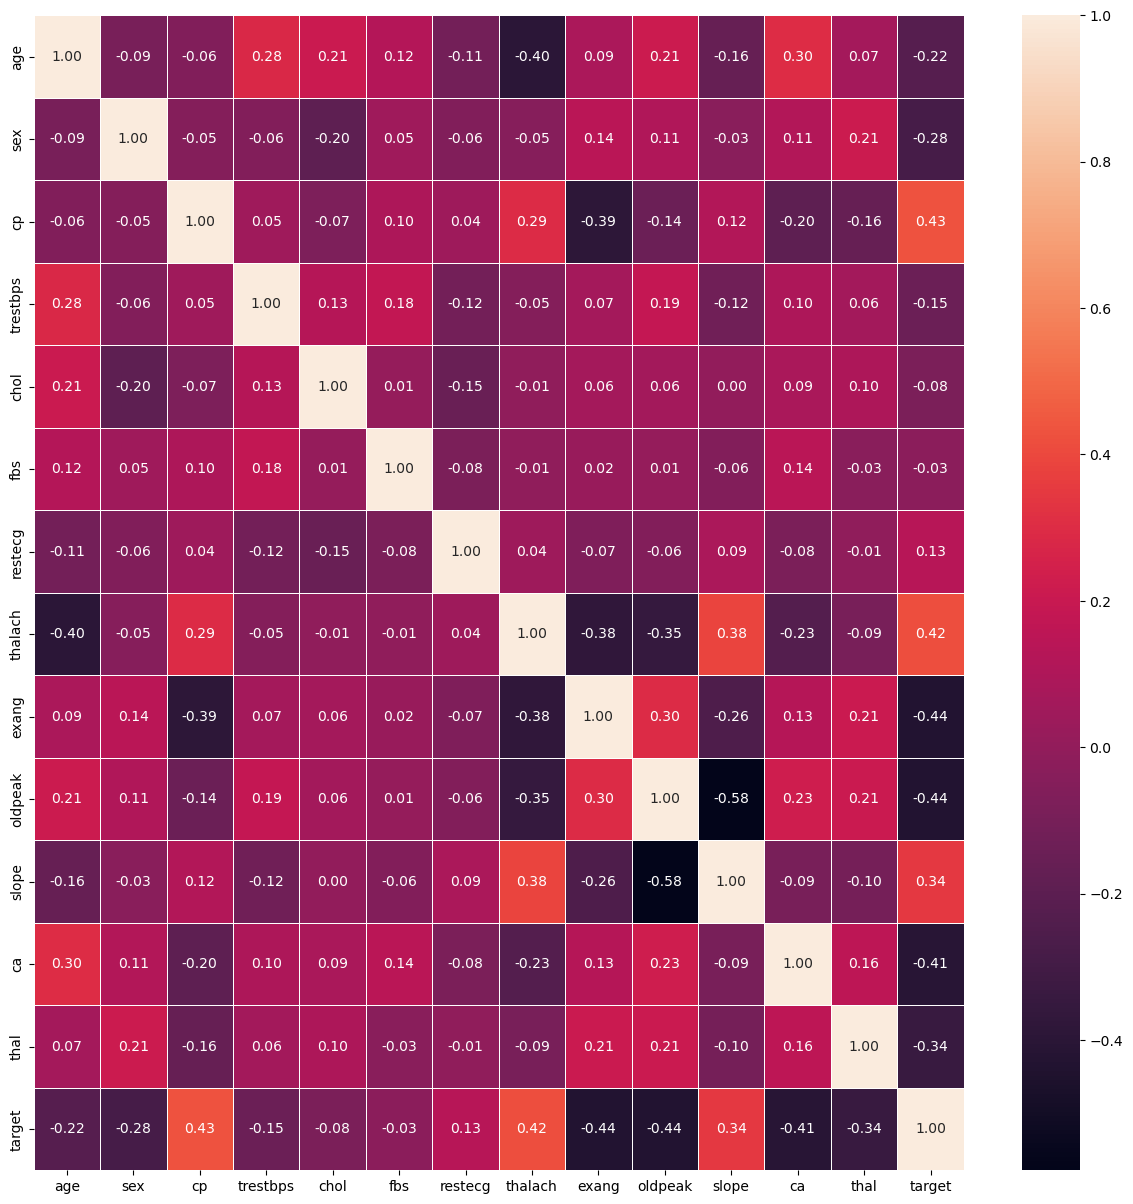

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(heart_data.corr(),annot=True,linewidth=0.5,fmt='0.2f')

<AxesSubplot:>

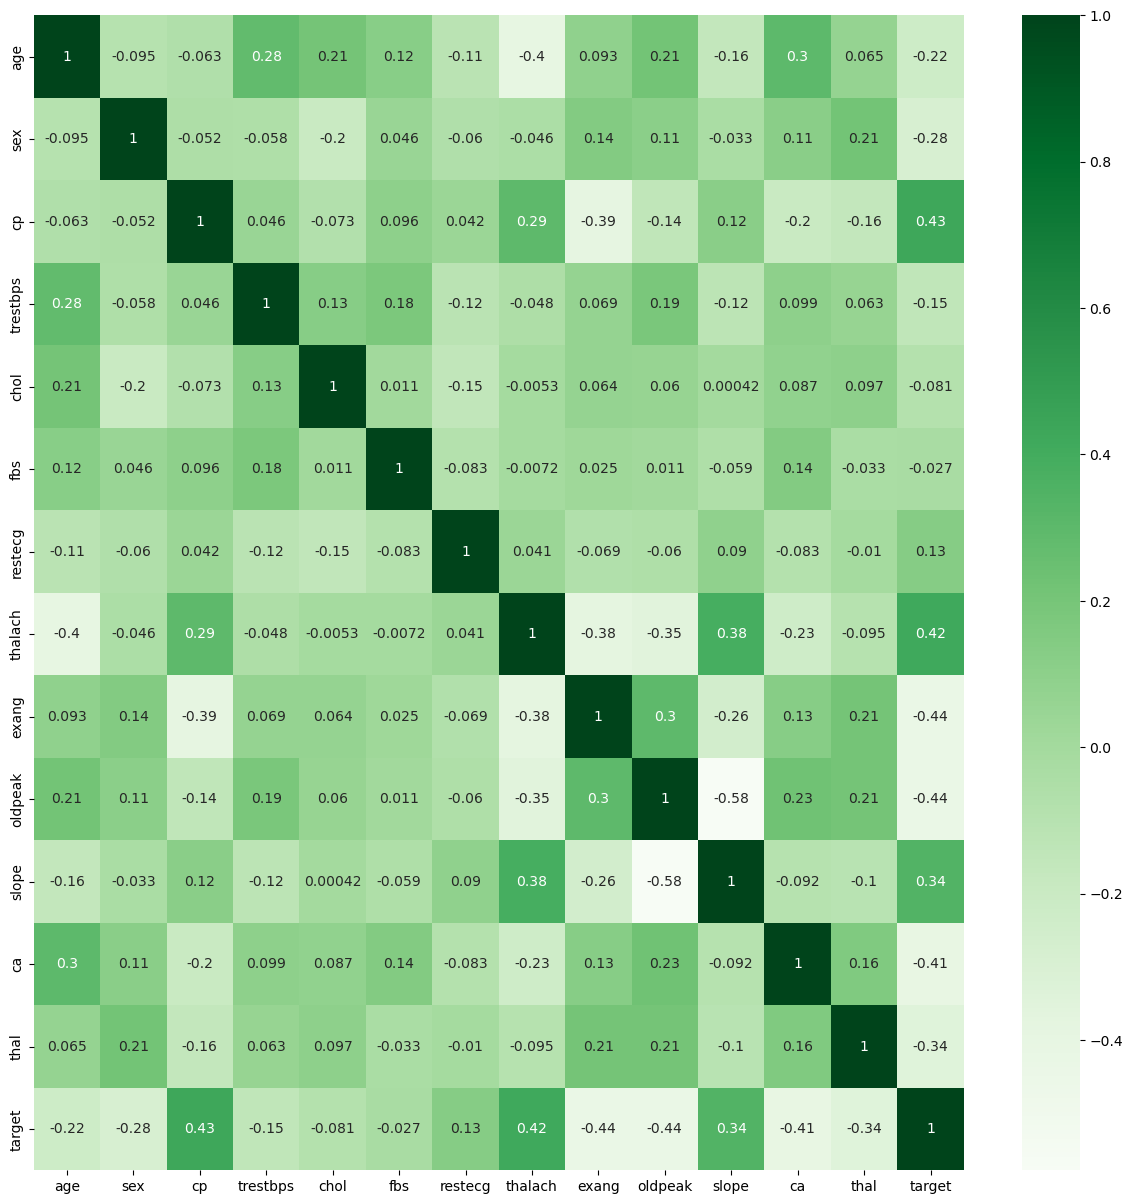

In [24]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(heart_data.corr(),cmap='Greens',annot = True)

In [25]:
heart_data['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

# Data Preprocessing

In [26]:
x=heart_data.drop(columns = 'target',axis=1)
y=heart_data['target']
x.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,10,2,2,3
1,53,1,0,140,203,1,0,155,1,29,0,0,3
2,70,1,0,145,174,0,1,125,1,25,0,0,3
3,61,1,0,148,203,0,1,161,0,0,2,1,3
4,62,0,0,138,294,1,1,106,0,18,1,3,2
5,58,0,0,100,248,0,0,122,0,10,1,0,2
6,58,1,0,114,318,0,2,140,0,37,0,3,1
7,55,1,0,160,289,0,0,145,1,8,1,1,3
8,46,1,0,120,249,0,0,144,0,8,2,0,3
9,54,1,0,122,286,0,0,116,1,30,1,2,2


In [27]:
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0       10   
1     53    1   0       140   203    1        0      155      1       29   
2     70    1   0       145   174    0        1      125      1       25   
3     61    1   0       148   203    0        1      161      0        0   
4     62    0   0       138   294    1        1      106      0       18   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0       15   
733   44    0   2       108   141    0        1      175      0        6   
739   52    1   0       128   255    0        1      161      1        0   
843   59    1   3       160   273    0        0      125      0        0   
878   54    1   0       120   188    0        1      113      0       14   

     slope  ca  thal  
0        2   2     3  
1        0   0     3  
2        0   0    

# Data Standardization

In [28]:
from sklearn.preprocessing import StandardScaler # to standardize our data
scaler = StandardScaler()

In [29]:
scaler.fit(x)

StandardScaler()

In [30]:
standardized_data = scaler.transform(x)   #scaler.fit_transform

In [31]:
print(standardized_data)

[[-0.26796589  0.68265615 -0.93520799 ...  0.97951442  1.27497996
   1.11996657]
 [-0.15726042  0.68265615 -0.93520799 ... -2.27118179 -0.71491124
   1.11996657]
 [ 1.72473259  0.68265615 -0.93520799 ... -2.27118179 -0.71491124
   1.11996657]
 ...
 [-0.26796589  0.68265615 -0.93520799 ...  0.97951442  0.28003436
   1.11996657]
 [ 0.50697241  0.68265615  1.97647049 ...  0.97951442 -0.71491124
  -0.51399432]
 [-0.04655495  0.68265615 -0.93520799 ... -0.64583368  0.28003436
   1.11996657]]


In [32]:
x = standardized_data     #data
y = heart_data['target']   #model

In [33]:
print(x)
print()
print(y)

[[-0.26796589  0.68265615 -0.93520799 ...  0.97951442  1.27497996
   1.11996657]
 [-0.15726042  0.68265615 -0.93520799 ... -2.27118179 -0.71491124
   1.11996657]
 [ 1.72473259  0.68265615 -0.93520799 ... -2.27118179 -0.71491124
   1.11996657]
 ...
 [-0.26796589  0.68265615 -0.93520799 ...  0.97951442  0.28003436
   1.11996657]
 [ 0.50697241  0.68265615  1.97647049 ...  0.97951442 -0.71491124
  -0.51399432]
 [-0.04655495  0.68265615 -0.93520799 ... -0.64583368  0.28003436
   1.11996657]]

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64


# Splitting the dataset into training and test dataset

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size = 0.2,random_state = 3)

In [35]:
print(f"Shape of training data : {x_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {x_test.shape}, {y_test.shape}")

Shape of training data : (241, 13), (241,)
Shape of testing data : (61, 13), (61,)


# Logistic regression

In [36]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [37]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#defining the model
classifier= LogisticRegression() 
#train the model
classifier.fit(x_train, y_train) 

LogisticRegression()

In [38]:
#Predicting the test set result or target values 
y_pred= classifier.predict(x_test)  

In [39]:
#Comparing predicted values with the actual values
value=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred})
value.head(10)

,Actual Value,Predicted Value
97,0,0
40,1,1
10,1,1
182,0,0
175,0,0
67,0,0
421,1,1
320,1,1
282,1,1
119,1,1


In [40]:
cm= confusion_matrix(y_test, y_pred)  
cr= classification_report(y_test, y_pred)
acc = round(accuracy_score(y_test, y_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{cm}")
print(f"\nClassification Report : \n\n{cr}")
print(f"\nThe Accuracy of Logistic Regression is {acc} %")

Confusion Matrix : 

[[23  7]
 [ 1 30]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.96      0.77      0.85        30
           1       0.81      0.97      0.88        31

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61


The Accuracy of Logistic Regression is 86.89 %


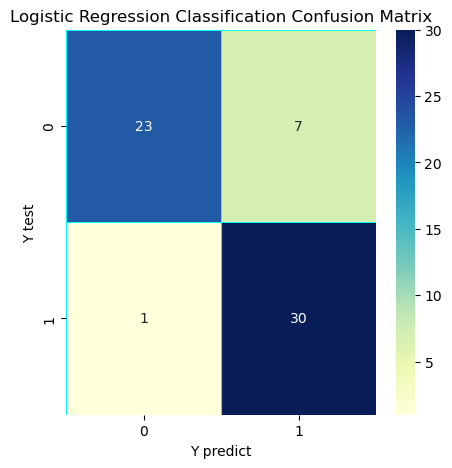

In [41]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

# Support Vector Machine

In [42]:
from sklearn.svm import SVC
try:
    svc=SVC(kernel = 'linear')
    svc=svc.fit(x_train,y_train)
    y_pred1=svc.predict(x_test)
except:
    print()
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87        30
           1       0.83      0.97      0.90        31

    accuracy                           0.89        61
   macro avg       0.90      0.88      0.88        61
weighted avg       0.90      0.89      0.88        61



In [43]:
cm= confusion_matrix(y_test, y_pred1)  
cr= classification_report(y_test, y_pred1)
acc = round(accuracy_score(y_test, y_pred1)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{cm}")
print(f"\nClassification Report : \n\n{cr}")
print(f"\nThe Accuracy of Support Vector Machine is {acc} %")

Confusion Matrix : 

[[24  6]
 [ 1 30]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.96      0.80      0.87        30
           1       0.83      0.97      0.90        31

    accuracy                           0.89        61
   macro avg       0.90      0.88      0.88        61
weighted avg       0.90      0.89      0.88        61


The Accuracy of Support Vector Machine is 88.52 %


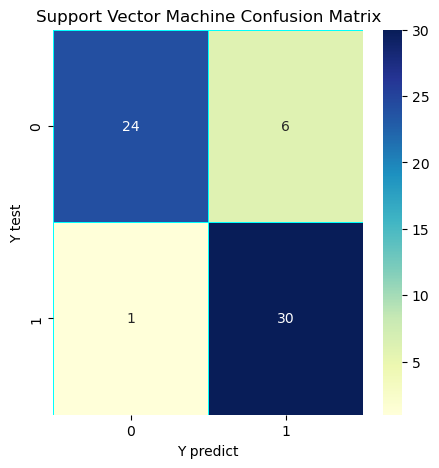

In [44]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Support Vector Machine Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

# Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(x_train,y_train)
y_pred2 = gnb.predict(x_test)

In [46]:
cm= confusion_matrix(y_test, y_pred2)  
cr= classification_report(y_test, y_pred2)
acc = round(accuracy_score(y_test, y_pred2)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{cm}")
print(f"\nClassification Report : \n\n{cr}")
print(f"\nThe Accuracy of Naive Bayes algorithm is {acc} %")

Confusion Matrix : 

[[24  6]
 [ 2 29]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        30
           1       0.83      0.94      0.88        31

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61


The Accuracy of Naive Bayes algorithm is 86.89 %


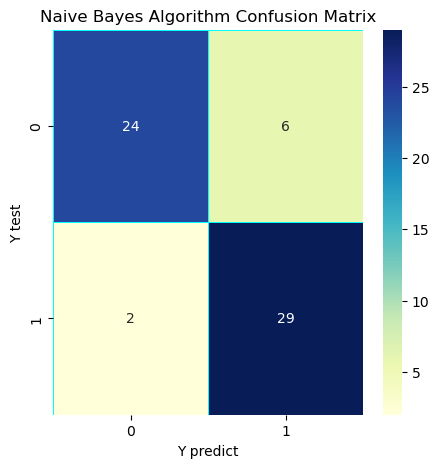

In [47]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Naive Bayes Algorithm Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

# k - nearest neighbour

In [48]:
from sklearn.neighbors import KNeighborsClassifier
classify = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski',p= 2)
classify.fit(x_train,y_train)

KNeighborsClassifier()

In [49]:
y_pred3 = classify.predict(x_test)

In [50]:
cm= confusion_matrix(y_test, y_pred3)  
cr= classification_report(y_test, y_pred3)
acc = round(accuracy_score(y_test, y_pred3)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{cm}")
print(f"\nClassification Report : \n\n{cr}")
print(f"\nThe Accuracy of k- Nearest Neighbor algorithm is {acc} %")

Confusion Matrix : 

[[23  7]
 [ 3 28]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.88      0.77      0.82        30
           1       0.80      0.90      0.85        31

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61


The Accuracy of k- Nearest Neighbor algorithm is 83.61 %


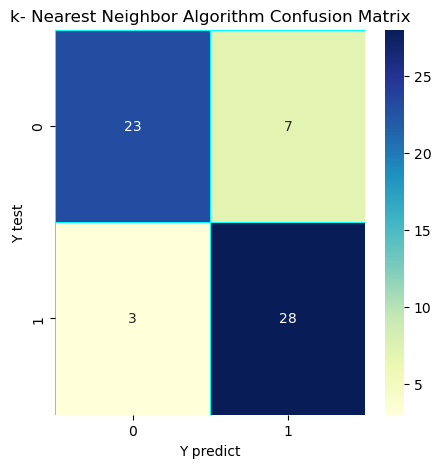

In [51]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('k- Nearest Neighbor Algorithm Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

# Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',random_state=3)
dt=dt.fit(x_train,y_train)
y_pred4=dt.predict(x_test)

In [53]:
cm= confusion_matrix(y_test, y_pred4)  
cr= classification_report(y_test, y_pred4)
acc = round(accuracy_score(y_test, y_pred4)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{cm}")
print(f"\nClassification Report : \n\n{cr}")
print(f"\nThe Accuracy of Decision Tree algorithm is {acc} %")

Confusion Matrix : 

[[24  6]
 [ 6 25]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        30
           1       0.81      0.81      0.81        31

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61


The Accuracy of Decision Tree algorithm is 80.33 %


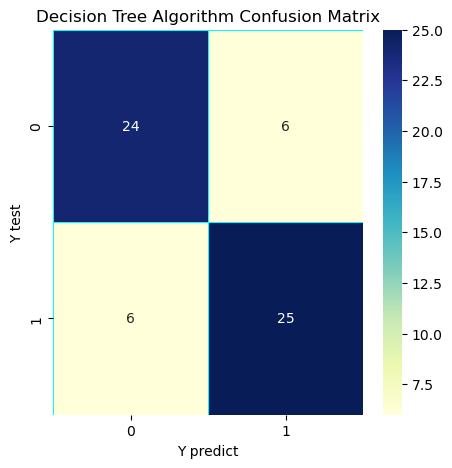

In [54]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Decision Tree Algorithm Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

# Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion="entropy", n_estimators=99)
rfc=rfc.fit(x_train,y_train)
y_pred5=rfc.predict(x_test)

In [56]:
cm= confusion_matrix(y_test, y_pred5)  
cr= classification_report(y_test, y_pred5)
acc = round(accuracy_score(y_test, y_pred5)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{cm}")
print(f"\nClassification Report : \n\n{cr}")
print(f"\nThe Accuracy of Random Forest algorithm is {acc} %")

Confusion Matrix : 

[[23  7]
 [ 4 27]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        30
           1       0.79      0.87      0.83        31

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61


The Accuracy of Random Forest algorithm is 81.97 %


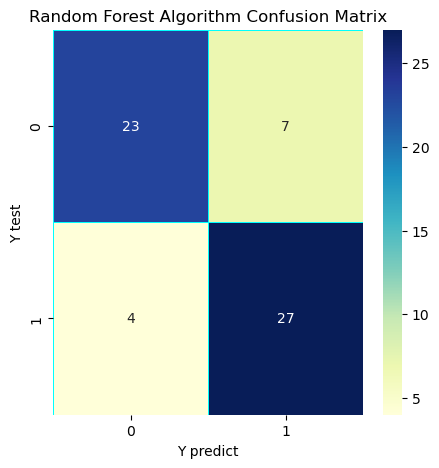

In [57]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Random Forest Algorithm Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

# Building a predictive system

# Support Vector Machine

In [58]:
input_data = (58,0,0,100,248,0,0,122,0,10,1,0,2) 

# change the input data to a numpy array
input_data_np = np.asarray(input_data)

# reshape the numpy array as we are predicting for only on isntance
input_data_re = input_data_np.reshape(1, -1)

s_data = scaler.transform(input_data_re)

pred = svc.predict(s_data)

print(pred)

if(pred[0] == 0):
    print("The person does not have a Heart Disease")
else:
    print("The person has Heart Disease")

[1]
The person has Heart Disease


In [59]:
# 52,1,0,125,212,0,1,168,0,10,2,2,3 ---> 0

In [60]:
# 58,0,0,100,248,0,0,122,0,10,1,0,2 ---> 1

In [61]:
# 70,1,0,145,174,0,1,125,1,25,0,0,3 ---> 0

In [62]:
# 71,0,0,112,149,0,1,125,0,1.6,1,0,2 ---> 1

# Saving the trained model

In [63]:
import pickle

In [64]:
filename = 'heart_disease_model.sav'
pickle.dump(dt, open(filename, 'wb'))

In [65]:
# loading the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

In [66]:
input_data = (70,1,0,145,174,0,1,125,1,25,0,0,3)

# changing the input_data to numpy array
input_data_np = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_re = input_data_np.reshape(1, -1)

pred_x = pd.DataFrame(input_data_re)
std_data = scaler.transform(pred_x)
print()

prediction = svc.predict(std_data)
print(prediction)
print()

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')


[0]

The Person does not have a Heart Disease
